In [4]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, MultiTaskLassoCV, MultiTaskLasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
d = pd.read_excel('../../data/out/sophy.xlsx', sheet_name='sample', index_col=0)

In [5]:
d = pd.read_csv('../../data/in/datasets/unmodified/The_Australian_Phytoplankton_Database_(1844_-_2016)_-_abundance_and_biovolume_(SUPERSEDED_BY_ONGOING_COLLECTION).csv')

C:\Users\Ayush Nag\AppData\Local\Temp\ipykernel_2896\1590275289.py:1: DtypeWarning: Columns (4,32,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv('../../data/in/datasets/unmodified/The_Australian_Phytoplankton_Database_(1844_-_2016)_-_abundance_and_biovolume_(SUPERSEDED_BY_ONGOING_COLLECTION).csv')


Australian Database version

In [ ]:
s = d[d['PRESENCE_ABSENCE'] == 'TRUE']
x_cols: list = ['salinity', 'temperature', 'chl_a', 'nitrate']
y_col: str = 'percent_phaeo'
y_cols: list = ['percent_phaeo', 'percent_diatom', 'percent_other']
# y_cols: list = ['chemtax_diatoms', 'chemtax_haptophytes', 'chemtax_mixed_flagellates', 'chemtax_prasinophytes']
s = s[x_cols + y_cols]
# try par, ph, oxygen, sea ice cover ()
s = s.dropna().reset_index()
# s[y_cols] = s[y_col].fillna(0)
s = s[(np.abs(stats.zscore(s)) < 5).all(axis=1)]
s = s[s['percent_diatom'] > 0.01]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(s[x_cols], s[y_cols], test_size=0.33, random_state=42)

SOPHY version

In [48]:
# s = d[d['source_name'] == 'joyw']
x_cols: list = ['salinity', 'temperature', 'chl_a', 'nitrate']
y_col: str = 'percent_phaeo'
y_cols: list = ['percent_phaeo', 'percent_diatom', 'percent_other']
# y_cols: list = ['chemtax_diatoms', 'chemtax_haptophytes', 'chemtax_mixed_flagellates', 'chemtax_prasinophytes']
s = d[x_cols + y_cols]
# try par, ph, oxygen, sea ice cover ()
s = s.dropna().reset_index()
# s[y_cols] = s[y_col].fillna(0)
s = s[(np.abs(stats.zscore(s)) < 5).all(axis=1)]
s = s[s['percent_diatom'] > 0.01]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(s[x_cols], s[y_cols], test_size=0.33, random_state=42)
# std_scaler = StandardScaler()
# X_test = pd.DataFrame(std_scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)
# X_train = s[x_cols]
# y_train = s[y_cols]

In [49]:
X_train

salinity  temperature      chl_a  nitrate
2441   33.6293      -0.0344   1.735000   26.210
3549   33.8386       1.0459   0.294000   25.280
5950   33.8790       2.1210   0.980494   19.289
1162   33.8990       0.2693   0.775700   29.420
2631   33.3761       2.0692   1.467750   17.110
...        ...          ...        ...      ...
4867   33.0910      -0.5740   0.403500   19.516
6353   32.8710       0.0620   3.214200   12.140
6388   33.3250       0.5310   5.182720   15.410
6557   33.1020       2.1280   0.877807   13.000
1823   32.8920      -0.3512  26.849600   10.060

[4064 rows x 4 columns]

In [18]:
# Z-Score Standardization
std_scaler = StandardScaler()
X_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(std_scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

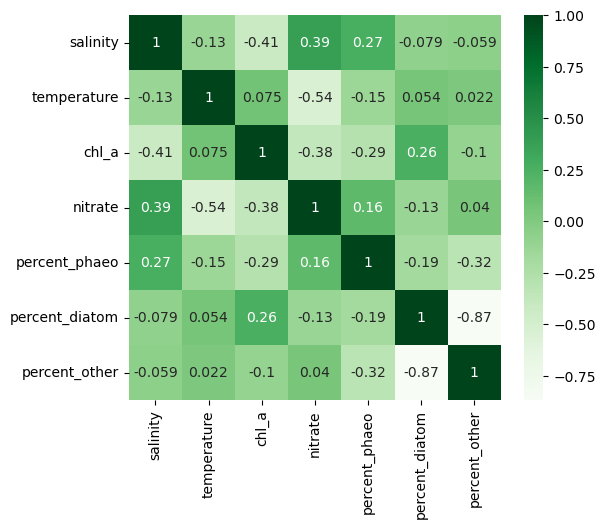

In [47]:
# Pearson Correlation
plt.figure(figsize=(6,5))
cor = pd.concat([X_train, y_train], axis=1).corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

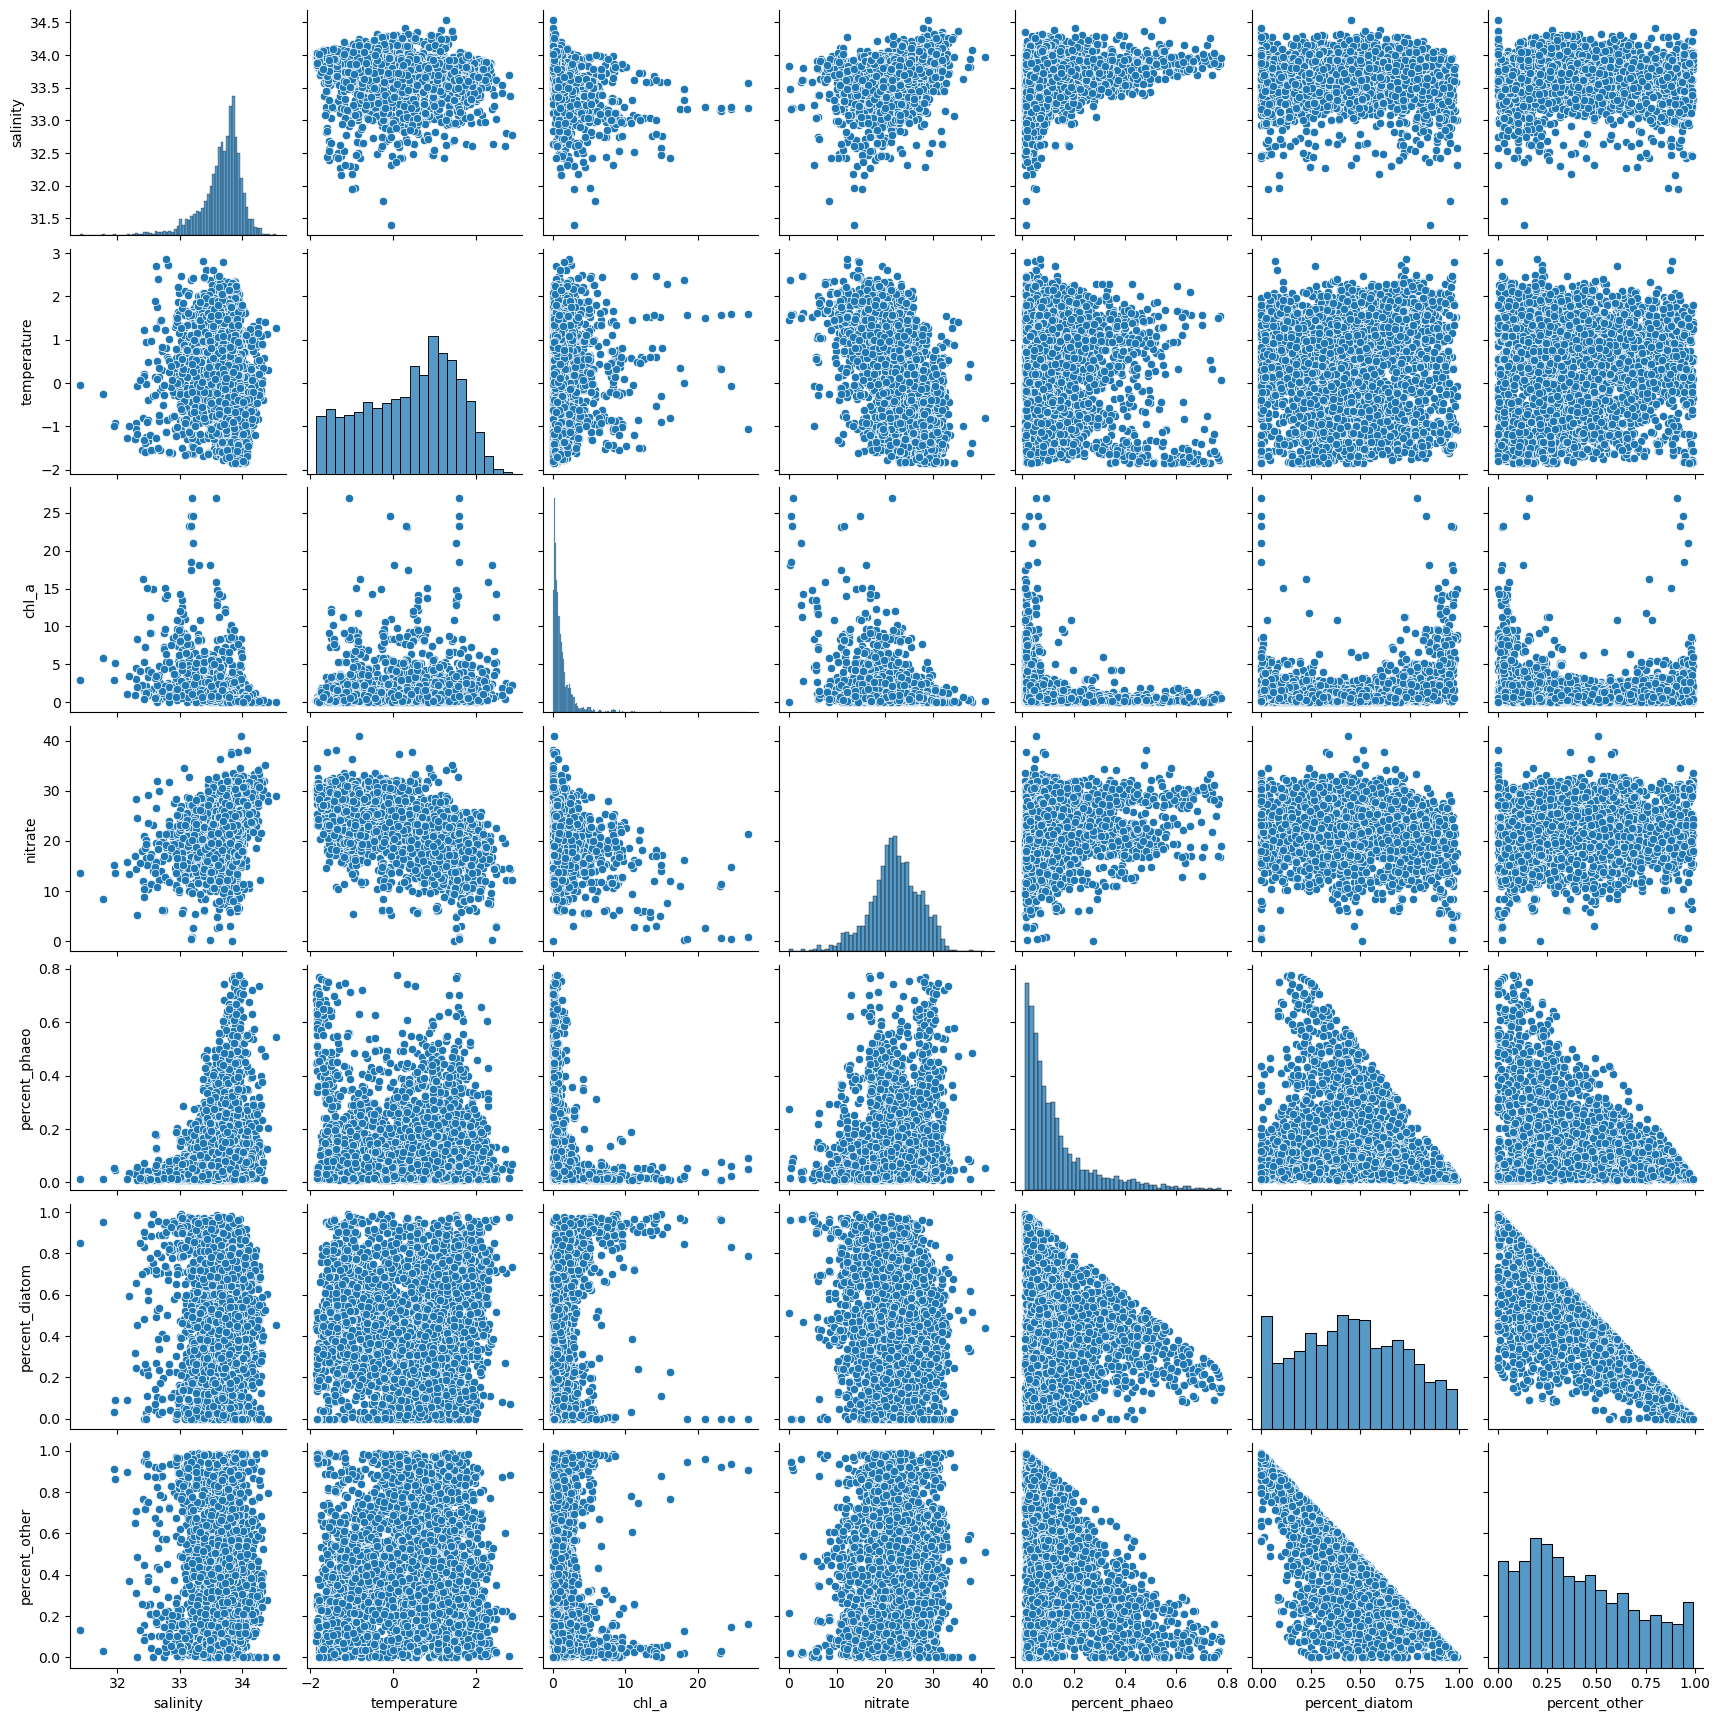

In [6]:
# Pairplots for X_feature vs percent_phaeo
s2 = pd.concat([X_train, y_train], axis=1)
# sns.pairplot(s2, x_vars=X_train.columns.values, y_vars=y_train.name)
# g = g.set(xscale="log")
# g.set(yscale="log")
# g.axes[0,1].set_xlim(-1,1)
sns.pairplot(s2)
# fig = plt.figure()
# plt.scatter(s2['nitrate'], s2['salinity'], s2['percent_phaeo'])

# mask = (s['temperature'] > -2) & (s['temperature'] <= -1.5)
# s.loc[mask].plot(x='temperature', y='percent_phaeo', kind='scatter', color='green')
# s.plot(x='temperature', y='percent_phaeo', kind='scatter', color='green')

Decision Tree MSE: 1.0232696644165676e-38
Decision Tree R^2: 1.0


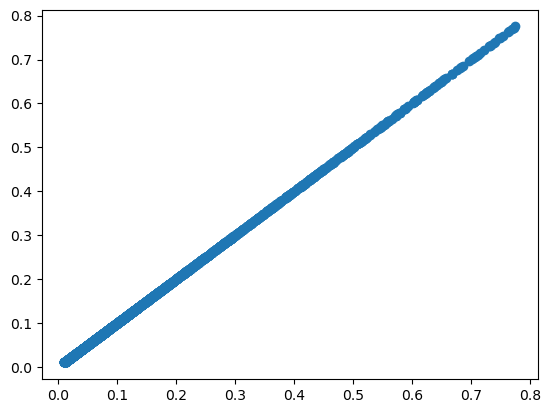

In [19]:
# define model
dtr = DecisionTreeRegressor()
# fit model
dtr.fit(X_train, y_train)
# make a prediction
yhat = dtr.predict(X_train)
# summarize prediction
plt.scatter(yhat, y_train)
print(f'Decision Tree MSE: {mean_squared_error(y_true=y_train, y_pred=yhat)}')
print(f'Decision Tree R^2: {r2_score(y_true=y_train, y_pred=yhat)}')

Random Forest MSE: 0.038534452292332634
Random Forest R^2: 0.46614414771954327


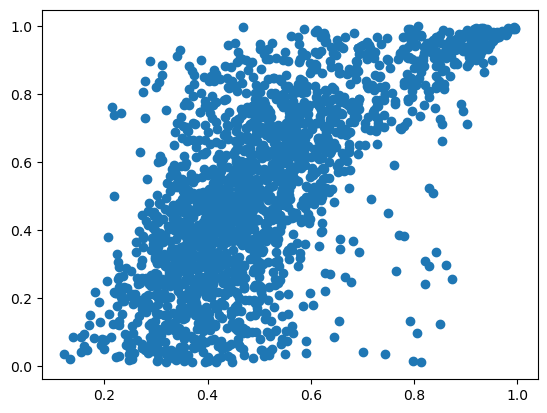

In [54]:
# TODO: currently overfitting, need to tune hyperparameters
# Really high R^2 on train but decent on test

# define model
rf = RandomForestRegressor(n_estimators=300, max_features='sqrt', max_depth=20, random_state=42, criterion='squared_error')
# fit model
rf.fit(X_train, y_train)
# make a prediction
yhat = rf.predict(X_test)
# summarize prediction
plt.scatter(yhat[:, 1], y_test['percent_diatom'])
print(f'Random Forest MSE: {mean_squared_error(y_true=y_test["percent_diatom"], y_pred=yhat[:, 1])}')
print(f'Random Forest R^2: {r2_score(y_true=y_test["percent_diatom"], y_pred=yhat[:, 1])}')

<AxesSubplot: ylabel='Frequency'>

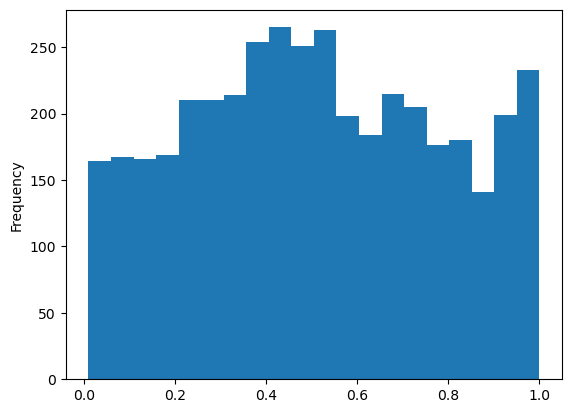

In [51]:
y_train['percent_diatom'].plot(kind='hist', bins=20)

<AxesSubplot: ylabel='Frequency'>

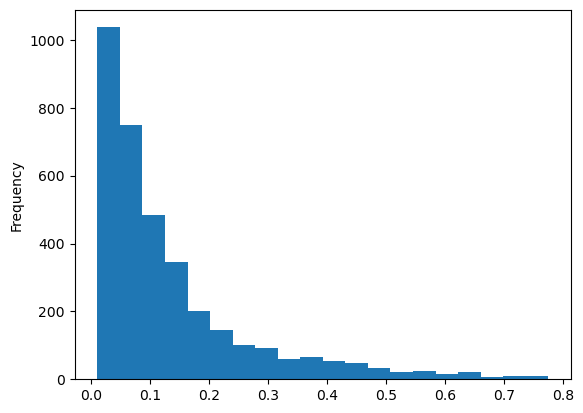

In [32]:
y_train['percent_phaeo'].plot(kind='hist', bins=20)

In [52]:
y_train

percent_phaeo  percent_diatom  percent_other
2441       0.070543        0.240354       0.689103
3549       0.127800        0.467527       0.404673
5950       0.108220        0.262281       0.629499
1162       0.033492        0.476952       0.489556
2631       0.014161        0.530856       0.454984
...             ...             ...            ...
4867       0.109844        0.555625       0.334531
6353       0.004898        0.460048       0.535054
6388       0.012619        0.937208       0.050174
6557       0.109084        0.647381       0.243536
1823       0.002801        0.992264       0.004935

[4064 rows x 3 columns]

In [17]:
print(np.sum(y_test, axis=1))

6696    1.0
6968    1.0
1729    1.0
3117    1.0
3585    1.0
       ... 
6211    1.0
2894    1.0
4871    1.0
2725    1.0
4711    1.0
Length: 1739, dtype: float64


In [ ]:
# Tune hyperparameters for SVR
# GridSearchCV

SVR MSE: 0.06598764380178401
SVR R^2: 0.04238519867588553


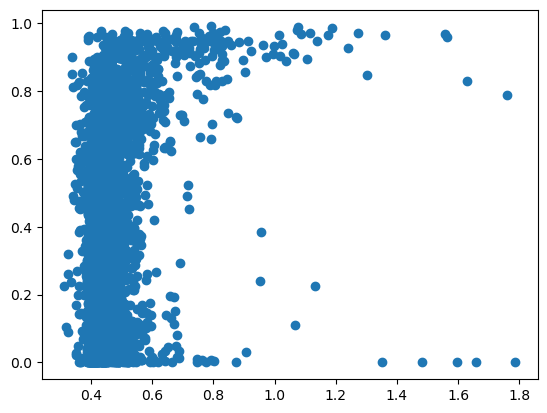

In [42]:
# define model
svr = SVR(kernel='linear', degree=7)
output_param = 'percent_diatom'
# fit model
svr.fit(X_train, y_train[output_param])
# make a prediction
yhat = svr.predict(X_train)
# summarize prediction
plt.scatter(yhat, y_train[output_param])
print(f'SVR MSE: {mean_squared_error(y_true=y_train[output_param], y_pred=yhat)}')
print(f'SVR R^2: {r2_score(y_true=y_train[output_param], y_pred=yhat)}')

In [43]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
modelCV = MultiTaskLassoCV(cv=cv)
# fit model
modelCV.fit(X_train, y_train)
# summarize chosen configuration
print('lasso alpha = %f' % modelCV.alpha_)

lasso alpha = 0.000410


Lasso MSE: 0.050977622278121304
Lasso R^2: 0.07328106650072386


0         1         2         3
0     salinity  0.075842  0.035237 -0.111079
1  temperature -0.017242  0.004795  0.012447
2        chl_a -0.014279  0.031107 -0.016828
3      nitrate -0.001692 -0.001765  0.003456

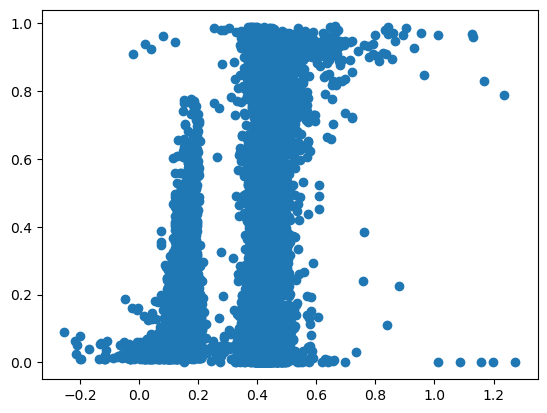

In [44]:
# define model
model = MultiTaskLasso(alpha=modelCV.alpha_, fit_intercept=True)
# fit model
model.fit(X_train, y_train)
# make a prediction
yhat = model.predict(X_train)
# summarize prediction
plt.scatter(yhat, y_train)
print(f'Lasso MSE: {mean_squared_error(y_true=y_train, y_pred=yhat)}')
print(f'Lasso R^2: {r2_score(y_true=y_train, y_pred=yhat)}')
pd.DataFrame(np.vstack((model.feature_names_in_, model.coef_)).T)

In [ ]:
d1 = pd.read_csv('../data/in/datasets/unmodified/AntarcticaLTERcompiledData_Station_forEDI.csv', index_col=0)
d2 = pd.read_csv('../data/in/datasets/unmodified/AntarcticaLTERcompiledData_Cruise_forEDI.csv', index_col=0)
d3 = pd.concat([d1, d2])
d3

DatetimeGMT  JulianDay  Event NominalStation  Latitude  \
studyName                                                                   
PAL9192    1991-11-26 14:17:00      330.0    NaN              A -64.77400   
PAL9192    1991-11-26 14:17:00      330.0    NaN              A -64.77400   
PAL9192    1991-11-26 14:55:00      330.0    NaN             HI       NaN   
PAL9192    1991-11-26 14:55:00      330.0    NaN             HI       NaN   
PAL9192    1991-11-26 14:55:00      330.0    NaN             HI       NaN   
...                        ...        ...    ...            ...       ...   
LMG20-01   2020-02-04 14:42:54       35.0  369.0            NaN -64.93341   
LMG20-01   2020-02-04 14:42:54       35.0  369.0            NaN -64.93341   
LMG20-01   2020-02-04 14:42:54       35.0  369.0            NaN -64.93341   
LMG20-01   2020-02-04 14:42:54       35.0  369.0            NaN -64.93341   
LMG20-01   2020-02-04 14:42:54       35.0  369.0            NaN -64.93341   

           Longitude  Depth  Temperature  Salinity  Density  ...  \
studyName                                                    ...   
PAL9192    -64.05500    0.0          NaN       NaN      NaN  ...   
PAL9192    -64.05500    0.0          NaN       NaN      NaN  ...   
PAL9192          NaN    0.0          NaN       NaN      NaN  ...   
PAL9192          NaN    1.0          NaN       NaN      NaN  ...   
PAL9192          NaN    3.0          NaN       NaN      NaN  ...   
...              ...    ...          ...       ...      ...  ...   
LMG20-01   -64.39771   15.0          NaN       NaN      NaN  ...   
LMG20-01   -64.39771   30.0          NaN       NaN      NaN  ...   
LMG20-01   -64.39771   50.0          NaN       NaN      NaN  ...   
LMG20-01   -64.39771   65.0          NaN       NaN      NaN  ...   
LMG20-01   -64.39771   75.0          NaN       NaN      NaN  ...   

           RoundedGridLine  RoundedGridStation  GridRegion  NorthSouthRegion  \
studyName                                                                      
PAL9192                NaN                 NaN         NaN               NaN   
PAL9192                NaN                 NaN         NaN               NaN   
PAL9192                NaN                 NaN         NaN               NaN   
PAL9192                NaN                 NaN         NaN               NaN   
PAL9192                NaN                 NaN         NaN               NaN   
...                    ...                 ...         ...               ...   
LMG20-01             600.0                40.0          NC                 N   
LMG20-01             600.0                40.0          NC                 N   
LMG20-01             600.0                40.0          NC                 N   
LMG20-01             600.0                40.0          NC                 N   
LMG20-01             600.0                40.0          NC                 N   

           InshoreOffshoreRegion  BottleNumber  HNA  LNA  DICTemperature  \
studyName                                                                  
PAL9192                      NaN           NaN  NaN  NaN             NaN   
PAL9192                      NaN           NaN  NaN  NaN             NaN   
PAL9192                      NaN           NaN  NaN  NaN             NaN   
PAL9192                      NaN           NaN  NaN  NaN             NaN   
PAL9192                      NaN           NaN  NaN  NaN             NaN   
...                          ...           ...  ...  ...             ...   
LMG20-01                       C          20.0  NaN  NaN             NaN   
LMG20-01                       C          18.0  NaN  NaN             NaN   
LMG20-01                       C          16.0  NaN  NaN             NaN   
LMG20-01                       C          14.0  NaN  NaN             NaN   
LMG20-01                       C          12.0  NaN  NaN             NaN   

           DICSalinity  
studyName               
PAL9192            NaN  
PAL9192            NaN  
PA

In [ ]:
x_cols: list = ['Salinity', 'Temperature', 'Chlorophylla', 'NO3']
y_col: list = ['Haptophytes', 'Prasinophytes', 'Cryptophytes',	'MixedFlagellates', 'Diatoms']
# y_col: str = 'Haptophytes'
s = d3.reset_index()
# try par, ph, oxygen, sea ice cover ()
# s = s.dropna()
s = s[s['Longitude'].between(-180, 180)]
s = s[s['Latitude'] <= -30]
s = s[x_cols + y_col]
s = s.dropna()
s = s[(np.abs(stats.zscore(s)) < 4).all(axis=1)]
# s = s[s['percent_diatom'] > 0]

# Train test split
# X_train, X_test, y_train, y_test = train_test_split(s[x_cols], s[y_col], test_size=0.33, random_state=42)

X_train = s[x_cols]
y_train = s[y_col]
X_train

Salinity  Temperature  Chlorophylla     NO3
921     33.6090      -1.0540      0.518050  20.939
927     33.6090      -1.0540      0.587687  17.234
928     33.5780      -1.1160      0.000000  22.549
934     33.6200      -1.1910      0.593414  19.505
935     33.8600      -1.1110      0.357298  20.795
...         ...          ...           ...     ...
44098   33.1576       1.5475      0.217000  15.700
44099   33.3066       1.2944      0.314000  16.800
44101   33.8512      -0.0699      0.237000  20.100
44102   33.9801      -0.2346      0.206000  20.600
44104   34.1073      -0.8929      0.068000  22.900

[6951 rows x 4 columns]

In [ ]:
# Z-Score Standardization
std_scaler = StandardScaler()
X_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

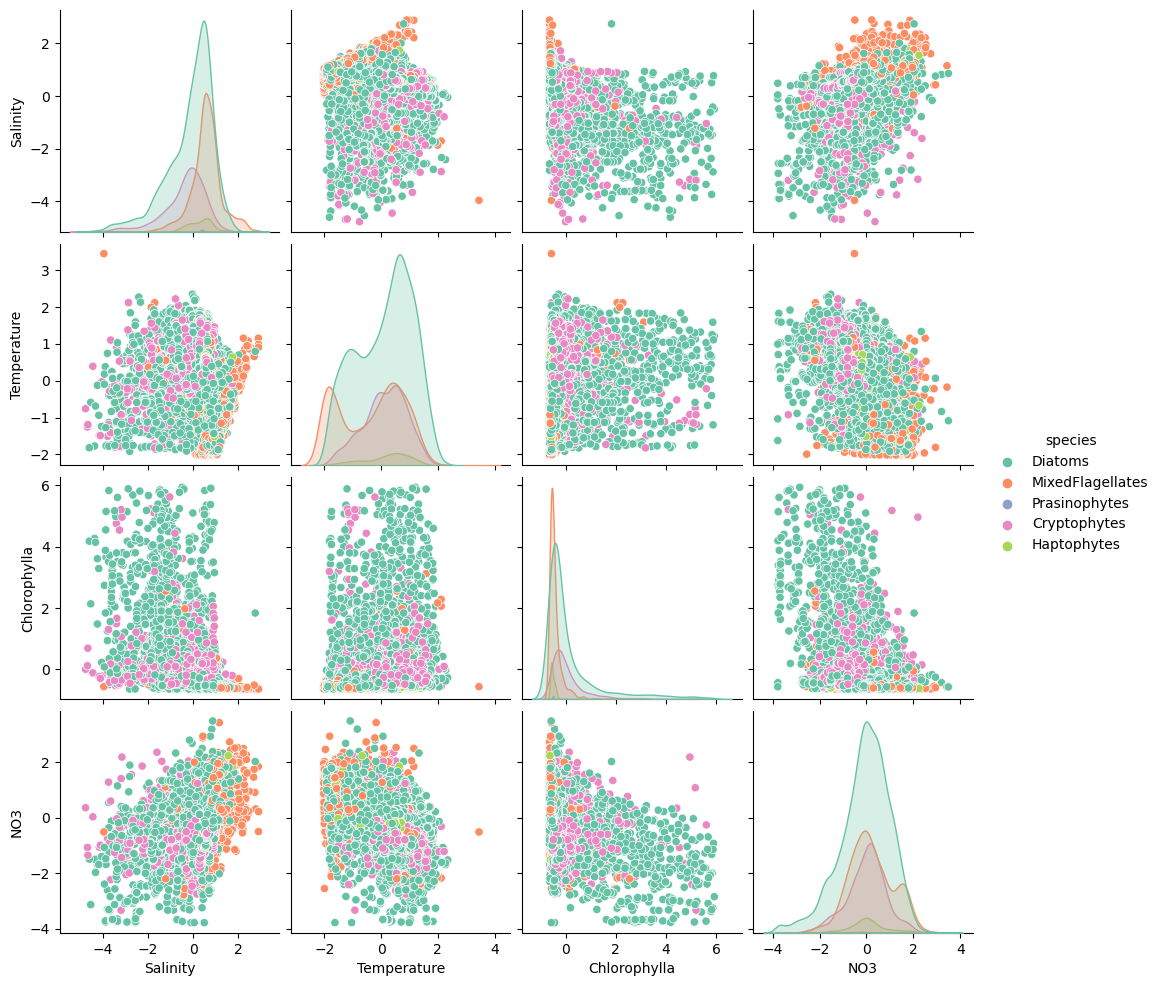

In [ ]:
s2 = pd.concat([X_train, s[y_col]], axis=1)
s2['species'] = s2[y_col].idxmax(axis=1)
s2.drop(y_col, axis=1, inplace=True)
sns.pairplot(s2, hue='species', palette='Set2')

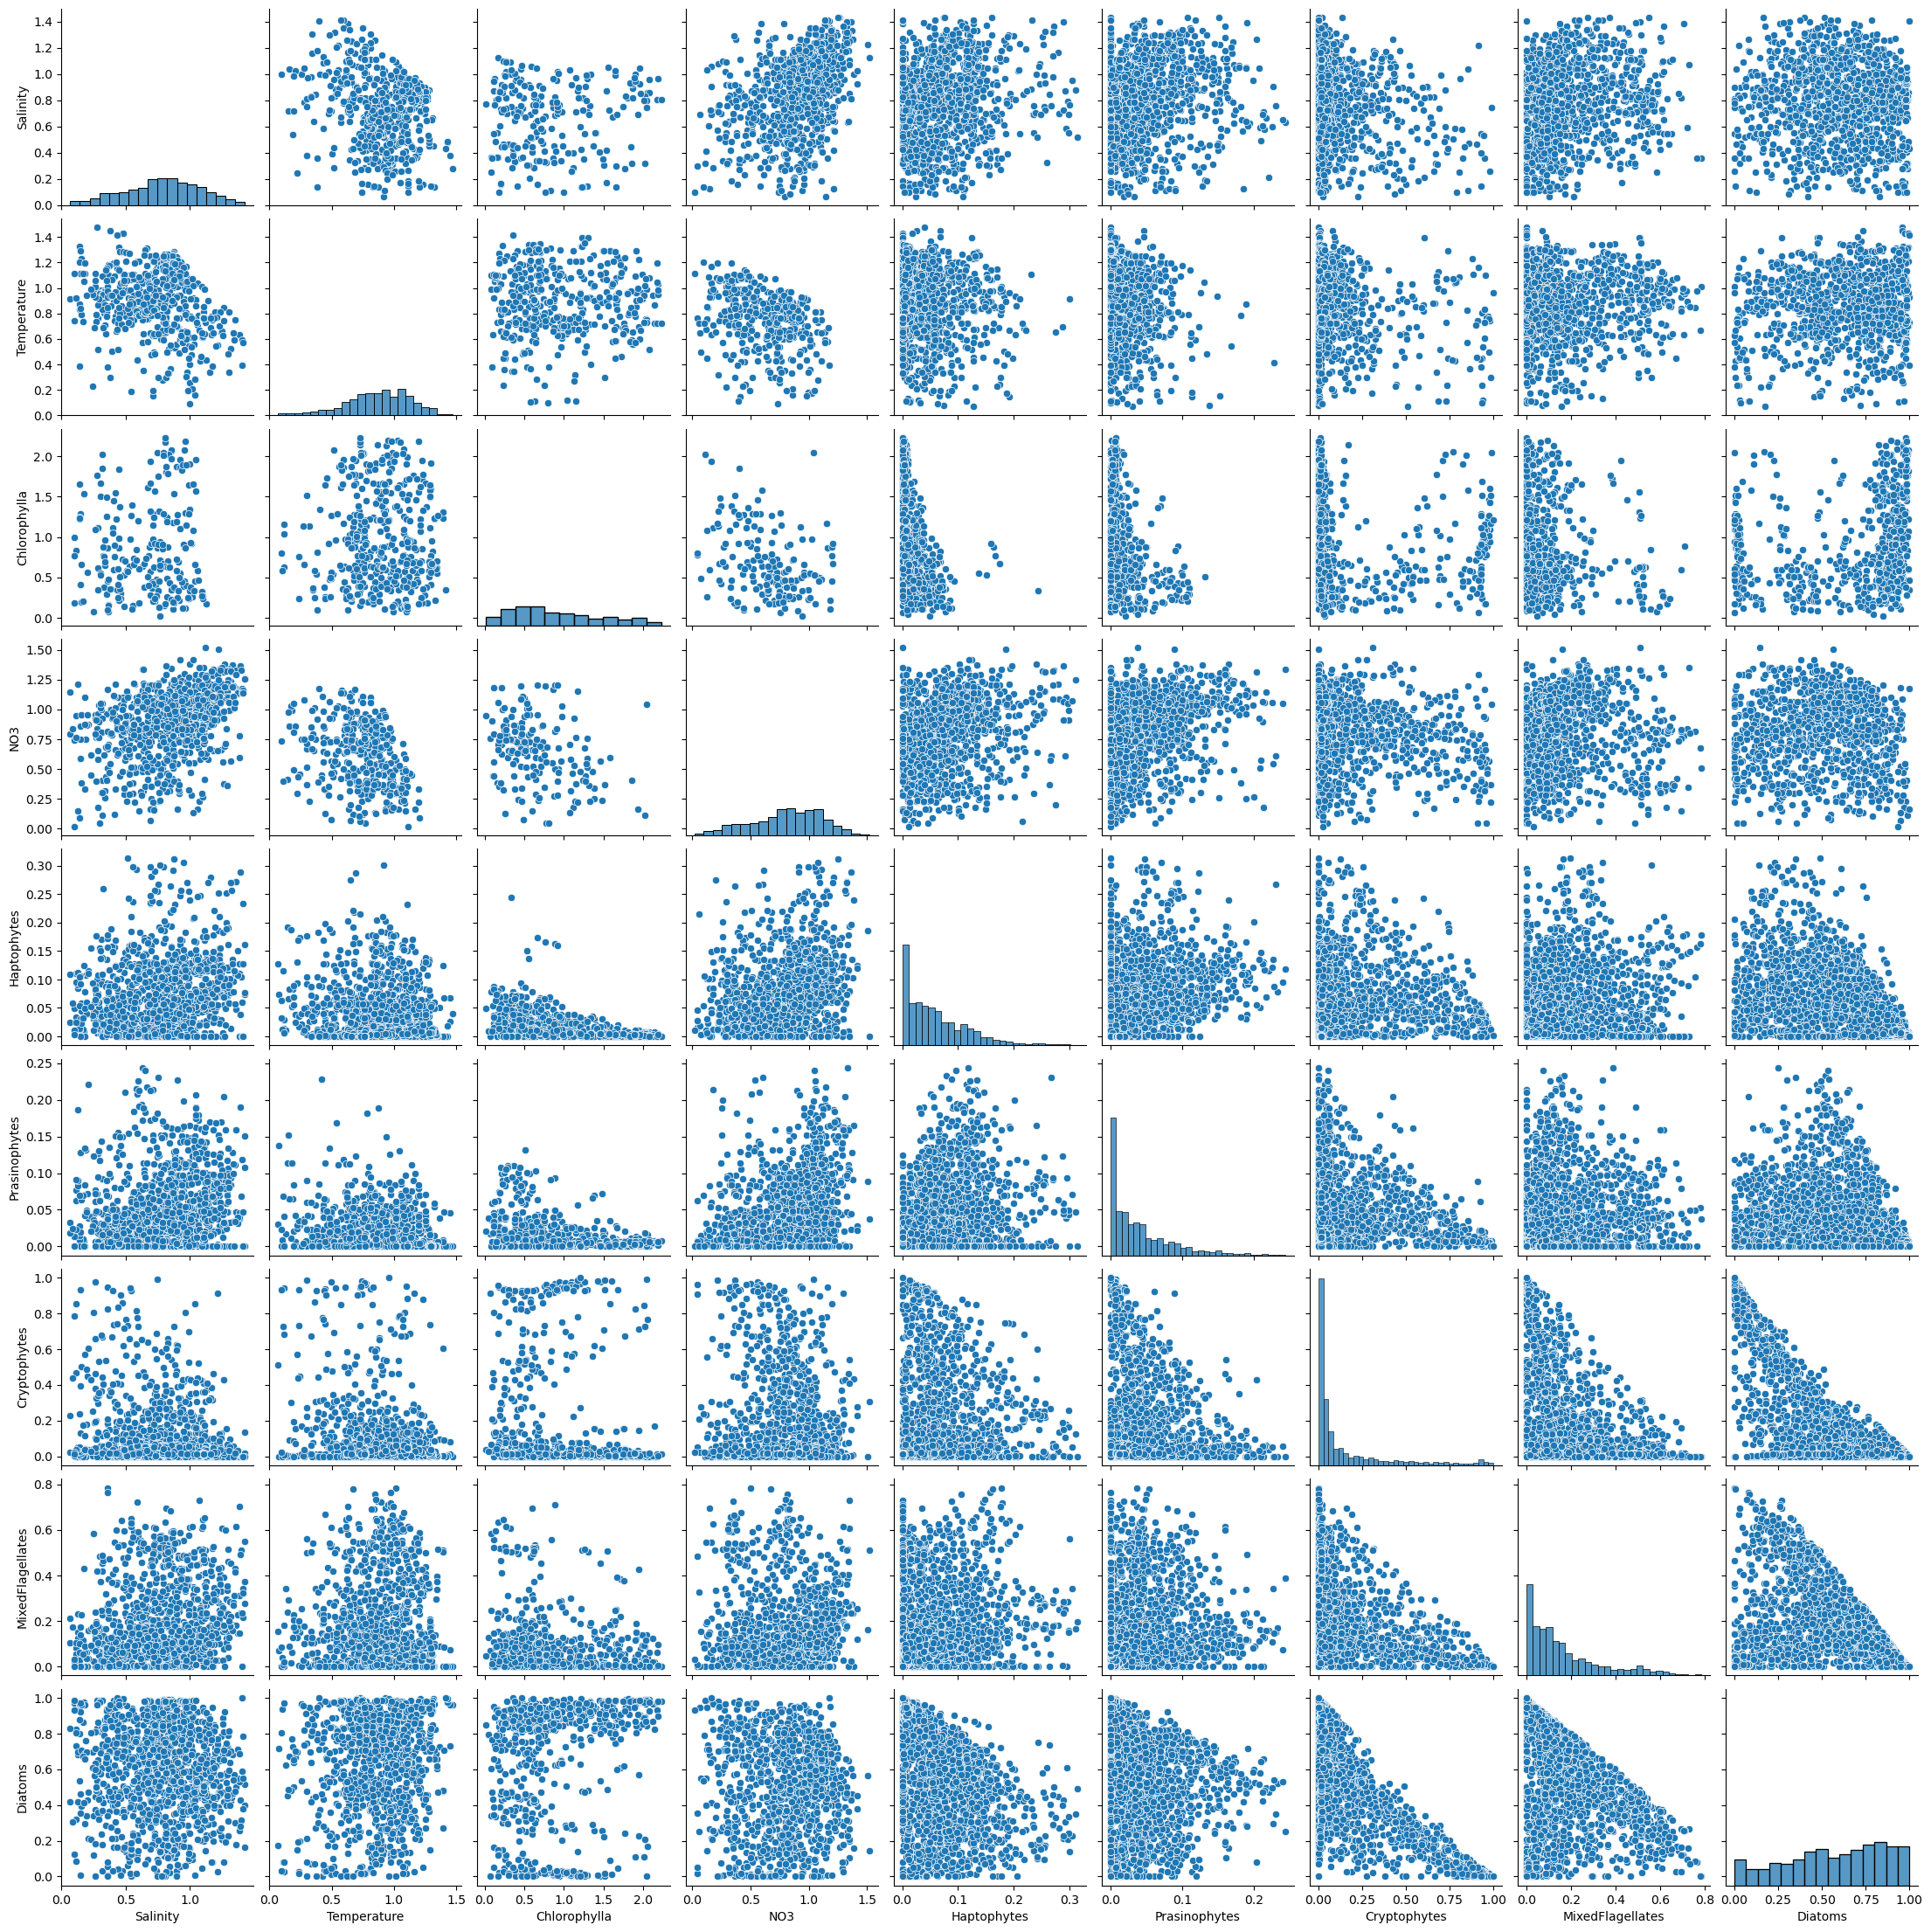

In [ ]:
s2 = pd.concat([np.power(X_train, 0.5), y_train], axis=1)
sns.pairplot(s2)